<a href="https://colab.research.google.com/github/BlessMario/MachineIntelligence/blob/main/02_cleaning_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAS Machine Learning: Lecture 02

## 0 - Loading Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from io import StringIO

## 1 - Loading the Dataset into a Pandas DataFrame

### The Airbnb Dataset

The AirBnB dataset contains data from properties in the state of NY. It containts the following information:

- `listing_id`: A unique identifier of the property
- `description`: A short description/title associated with the property
- `host_id`: The host unique identifier
- `host_name`: The host name
- `neighbourhood_full`: Name of the neighbourhood
- `coordinates`: Geographical coordinates of the property _(latitude, longitude)_
- `Listing added`: Date of registration of the property
- `room_type`: Type of the room 
- `rating`: User rating from 0 to 5.
- `price`: Price per night
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays so far

We first load the CSV Iris Dataset into a Pandas `DataFrame` object:

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%ls -la sample_data/airbnb.csv

-rw-r--r-- 1 root root 2022986 Sep  6 12:57 sample_data/airbnb.csv


In [28]:
df_airbnb = pd.read_csv("./sample_data/airbnb.csv")

**Dataframes:**

To better understand the data/dataframe, we use a set of functions available from pandas, which are summarised as follows:

- `.head()` prints the header of a given dataframe.
- `.dtypes` describes the datatypes of all columns in the dataframe.
- `.info()` provides an overview of the different column data types and missing values in the given dataframe
- `.describe()` returns a distribution of numeric columns in the dataframe
- `.isna().sum()` provides the number of missing values per column in our DataFrame
- `.unique()` retrieves the unique values in a given dataframe column

<br>

**Visualisation:**

- `sns.displot()` plots the distribution of one column in your dataframe.

In [29]:
# show the header of the dataframe
df_airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [33]:
# describes the datatype of all columns:
df_airbnb.describes()



AttributeError: ignored

In [7]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

We observe from the previous results, that some columns are not associated to their proper data type, e.g. the column `coordinates` shall be mapped to `float` numbers and also the `price`column. In addition, the dates such as `last_review` shall me converted into `datetime` columns.


In [8]:
# provide an overview of the different column data types and missing values:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

We can observe that there is some missing data especially in the columns `price`, `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, and `5_stars`. Because the number of missing values is the same across the aforementioned columns, we could think that they are somehow related to each other.

In [14]:
# display number of missing values per column:
df_airbnb.isna().sum()

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

From the previous results, we can see exactly what is the number of missing values. Also we can see that there is some variability in the number of missing columns and some dependency among them.

## 2 - Data Cleaning


##### **2.1 Data type problems:**
It is common to see that in data analytics tasks, some of the columns are not mapped correctly to their data type. In this section, we will deal with some of these problems.

In [23]:
df_airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


**Task 2.1.1**: We can see that the `coordinates` column is probably stored as a string (`str`), however, the geographical coordinates are usually `float`nuumbers. In this task, you should split the `coordinates` columns into latitude and longitude and map those values as `float` numbers. Finally, remove/drop the original `coordinates` column.

To achieve this, you can use the following methods:

- `.str.replace("","")` replaces one string with another for each row in a column.
- `.str.split("")` splits a column based on a string parameter.
- `.astype()` casts one column from one type to another.
- `.drop()` helps to remove a specific column.

In [43]:
# remove any unnecessary characters, such as "(" and ")" from the coordinates column.
df_airbnb['coordinates'] = df_airbnb['coordinates'].str.replace('(','')
df_airbnb['coordinates'] = df_airbnb['coordinates'].str.replace(')', '')
df_airbnb['coordinates'].head


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of 0                 40.63222, -73.93398
1                 40.78761, -73.96862
2                  40.7007, -73.99517
3                 40.79169, -73.97498
4                 40.71884, -73.98354
                     ...             
10014             40.80379, -73.95257
10015              40.79531, -73.9333
10016    40.68266, -73.96743000000002
10017             40.68832, -73.96366
10018             40.76174, -73.96625
Name: coordinates, Length: 10019, dtype: object>

In [42]:
# spit the coordinates column into two different columns and display the two new obtained columns.
coordinates = df_airbnb['coordinates'].str.split(",", expand = True)
coordinates.head()
df_airbnb['latitude'] = coordinates[0]

Ellipsis

In [47]:
# assign each new column (latitute and longitude) as an additional column into the dataframe.
df_airbnb['latitude'] = df_airbnb['latitude'].astype(float)
df_airbnb['longitude'] = df_airbnb['longitude'].astype(float)
...
...

Ellipsis

In [48]:
# display the different column types in the dataframe
df_airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [46]:
# correct the two new column data types and display the casted data types.
df_airbnb['coordinates'] = df_airbnb['coordinates'].str.replace('(','')
df_airbnb['coordinates'] = df_airbnb['coordinates'].str.replace(')', '')
...

ValueError: ignored

In [51]:
# remove/drop the coordinates column
df_airbnb.drop('coordinates', axis=1, inplace = True)
df_airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Task 2.1.2**: Similar to the `coordinates` column, the `price` column has some unwanted characters, such as `$`, which are attached to each `price` sample. We first need to remove this character and then convert the column to its correct datatype, i.e. `float`. Finally, visualise the price distributions.

To solve this task, you can refer to the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()` casts one column from one type to another.
- `sns.distplot()` to visualise distributions.

In [61]:
# compute the price mean in the dataframe:
#df_airbnb['price'] = df_airbnb['price'].str.replace("$","")
df_airbnb['price'] = df_airbnb['price'].str.strip("$")
df_airbnb['price'] = df_airbnb['price'].astype(float)
df_airbnb['price'].mean()

AttributeError: ignored

In [56]:
# remove the '$' character from the price column and display the dataframe.
df_airbnb['price'].head()


0     45.0
1    135.0
2    150.0
3     86.0
4    160.0
Name: price, dtype: float64

In [ ]:
# cast the price column from object type to float type
...

In [ ]:
# compute the price mean in the dataframe:
...

150.90512217564665

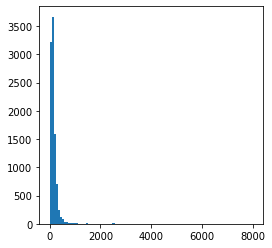

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


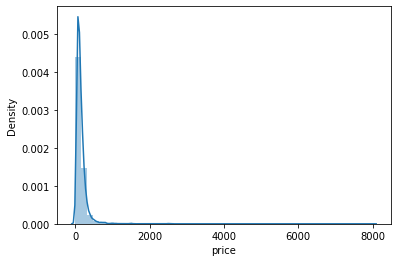

In [62]:
# visualize distribution of prices
df_airbnb['price'].hist(grid=False,bins=100)
fig= plt.gcf()
fig.set_size_inches(4,4)
plt.show()

sns.distplot(df_airbnb['price'])

**Task 2.1.3**: We can notice that the columns (`last_review` and `listing_added`) are not correctly mapped to date columns. In this task, you should map those columns as `datetime` types.
To solve this task, you can rely on the following functions:

- `pd.to_datetime(column, format = "")`
  - `format` defines the desired date format, such as: `"%Y-%m-%d"`

In [71]:
# map the last_review and listing_added columns from object type to datetime type:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'],errors='ignore', format="%Y-%m-%d")
df_airbnb['listing_added'] = pd.to_datetime(df_airbnb['listing_added'],errors='ignore', format="%Y-%m-%d")


In [78]:
# display the header of both mapped columns

df_airbnb[['last_review', 'listing_added', 'longitude']].head

<bound method NDFrame.head of       last_review listing_added  longitude
0      2018-12-12    2018-06-08  -73.93398
1      2019-06-30    2018-12-25  -73.96862
2             NaT    2018-08-15  -73.99517
3      2017-09-23    2017-03-20  -73.97498
4      2019-06-12    2020-10-23  -73.98354
...           ...           ...        ...
10014  2018-05-28    2017-11-22  -73.95257
10015  2018-05-06    2017-10-31  -73.93330
10016  2016-11-27    2016-05-24  -73.96743
10017  2019-05-31    2018-11-25  -73.96366
10018  2019-03-12    2018-09-06  -73.96625

[10019 rows x 3 columns]>

In [ ]:
# display the datatypes of both mapped columns
df_airbnb[['last_review', 'listing_added', 'longitude']].dtypes

last_review      datetime64[ns]
listing_added    datetime64[ns]
dtype: object

##### **2.2 Text data issues:** 
In a dataframe, it is possible that the string values of some columns are stored on the wrong format, which include capital letters, undesired characters/strings, trailing spaces, etc. In this section, we will use string methods to clean specific text-based columns.

**Task 2.2.1**: Given the `room_type` colum, we should clean its content by mapping its values onto lower case and remove white spaces. Finally, we will map some specific values onto new ones, e.g. `private` to `Private Room`, `entire home/apt` to `Entire place`, `home` to `Entire place`.


To solve this task, you can refer to the following methods:

- `.unique()` retrieves unique values in a specific column.
- `.str.lower()` to lowercase all rows in a string column.
- `.str.strip()` to remove all white spaces of each row in a string column.
- `.replace({'':''})` to replace values in a column with another.

In [85]:
# display all unique values of `room_type`
df_airbnb['room_type'].unique()

array(['Private Room', 'Entire Place', 'Shared Room'], dtype=object)

In [80]:
# map capitalized values to lowercase types.
df_airbnb['room_type'] = df_airbnb['room_type'].str.lower()


In [82]:
# remove trailing spaces
df_airbnb['room_type'] = df_airbnb['room_type'].str.strip()

In [84]:
# Replace values to 'Private Room', 'Hotel Room', 'Shared Room', 'Entire Place', 'Entire Place'.
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'hotel room': 'Hotel Room', 
            'entire home/apt': 'Entire Place',
            'shared room': 'Shared Room',
            'home': 'Entire Place'}

# map values given a dictionary as parameter
df_airbnb['room_type'] = df_airbnb['room_type'].map(mappings)

##### **2.3 Data range issues:** 
In a dataframe, it is possible that the range of values of specific columns is not valid. For instance, some values might be lower than the minimum lower value or larger than the upper valid limit.

**Task 2.3.1**: In this task, you will analyse the `rating` column and remove all undesired values. To solve this task, we can use the following methods:

- `sns.distplot()` displays the distribution of the values of a specific column.
- `dataframe['column'] > threshold]` masks/retrieves all values at the given column which fullfill the given condition.
- `.drop()` helps to remove a specific column by considering the given condition.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


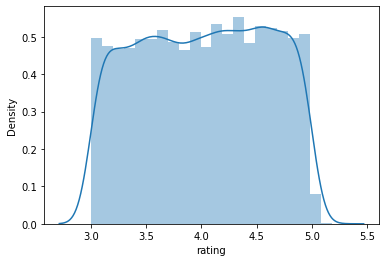

In [87]:
# display the rating column using distplot()
sns.distplot(df_airbnb['rating'])

In [98]:
# select all rows whose rating > 5.0
print(df_airbnb['rating'][df_airbnb['rating'] > 5.0])
unvalid_indeces = df_airbnb['rating'] > 5.0

Series([], Name: rating, dtype: float64)


In [94]:
# drop all the undesired rows by their indexes
df_airbnb = df_airbnb.drop(df_airbnb['rating'][df_airbnb['rating'] > 5.0].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


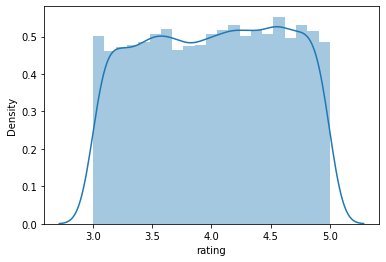

In [96]:
# display the rating column using distplot()
sns.distplot(df_airbnb['rating'])

In [97]:
# select all rows whose rating > 5.0
print(df_airbnb['rating'][df_airbnb['rating'] > 5.0])

Series([], Name: rating, dtype: float64)


##### **2.4 Missing data issues:** 
In a dataframe, there might be some missing values. There are different reasons including: data acquisition problems, storage issues, typying errors, etc.

**Task 2.4.1**: In this task, you should visualise the missing values in the dataframe to provide more insight from the data. To do so, you can use the following methods:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot


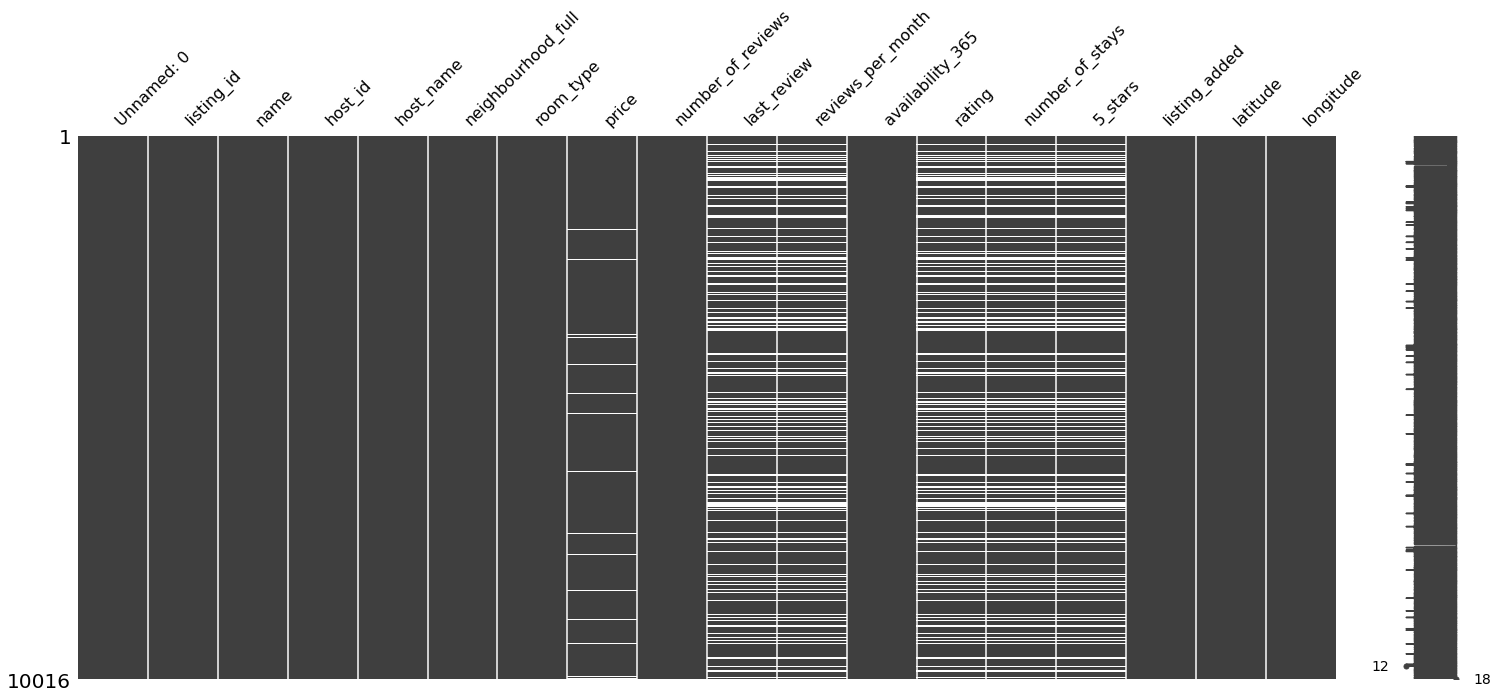

In [99]:
# visualise missing data in the dataframe
msno.matrix(df_airbnb)

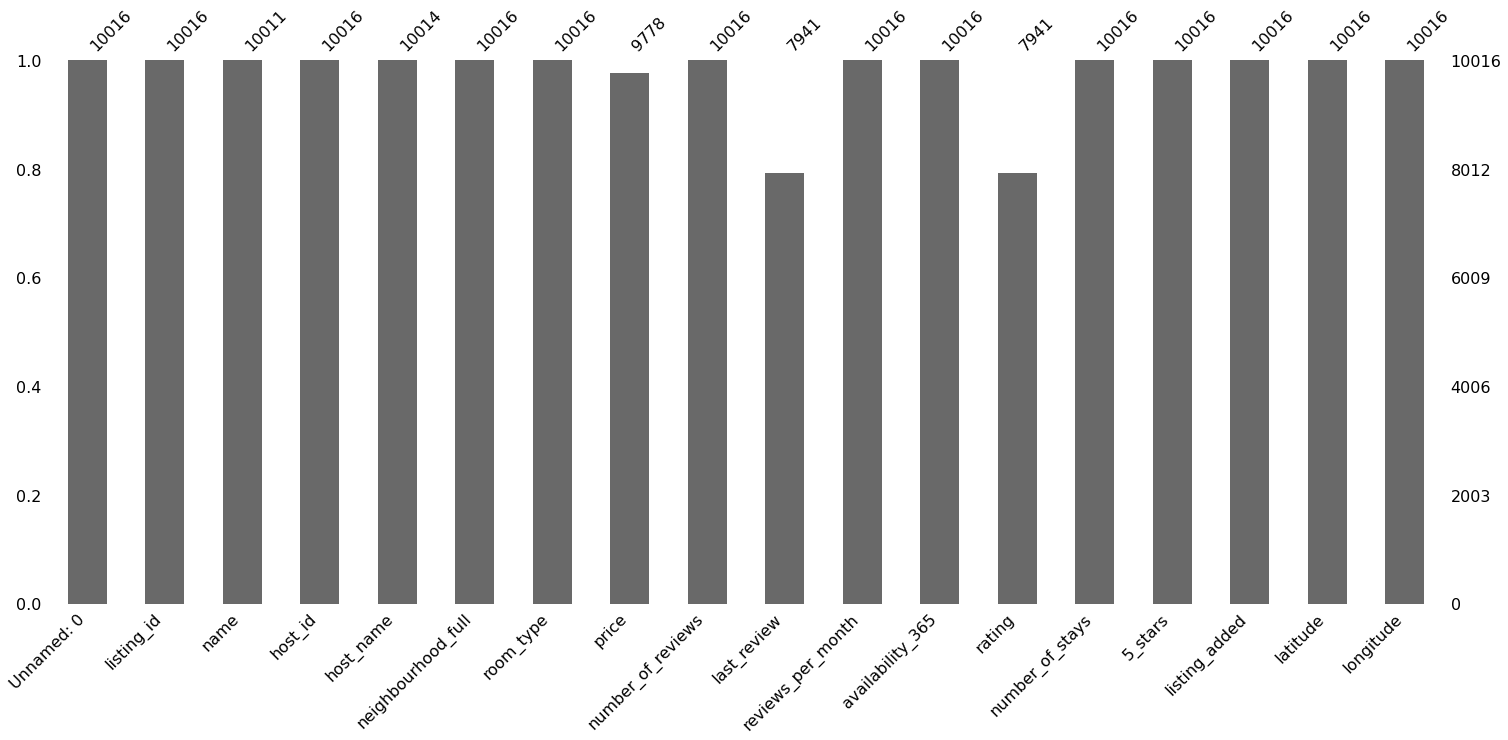

In [104]:
# display missing data as barplot
msno.bar(df_airbnb)

In [103]:
# fill missing data (reviews_per_month, number_of_stays, 5_stars) with 0's
df_airbnb.fillna({
    'reviews_per_month': df_airbnb['reviews_per_month'].mean(),
    'number_of_stays': 0,
    '5_stars': 0
}, inplace = True)


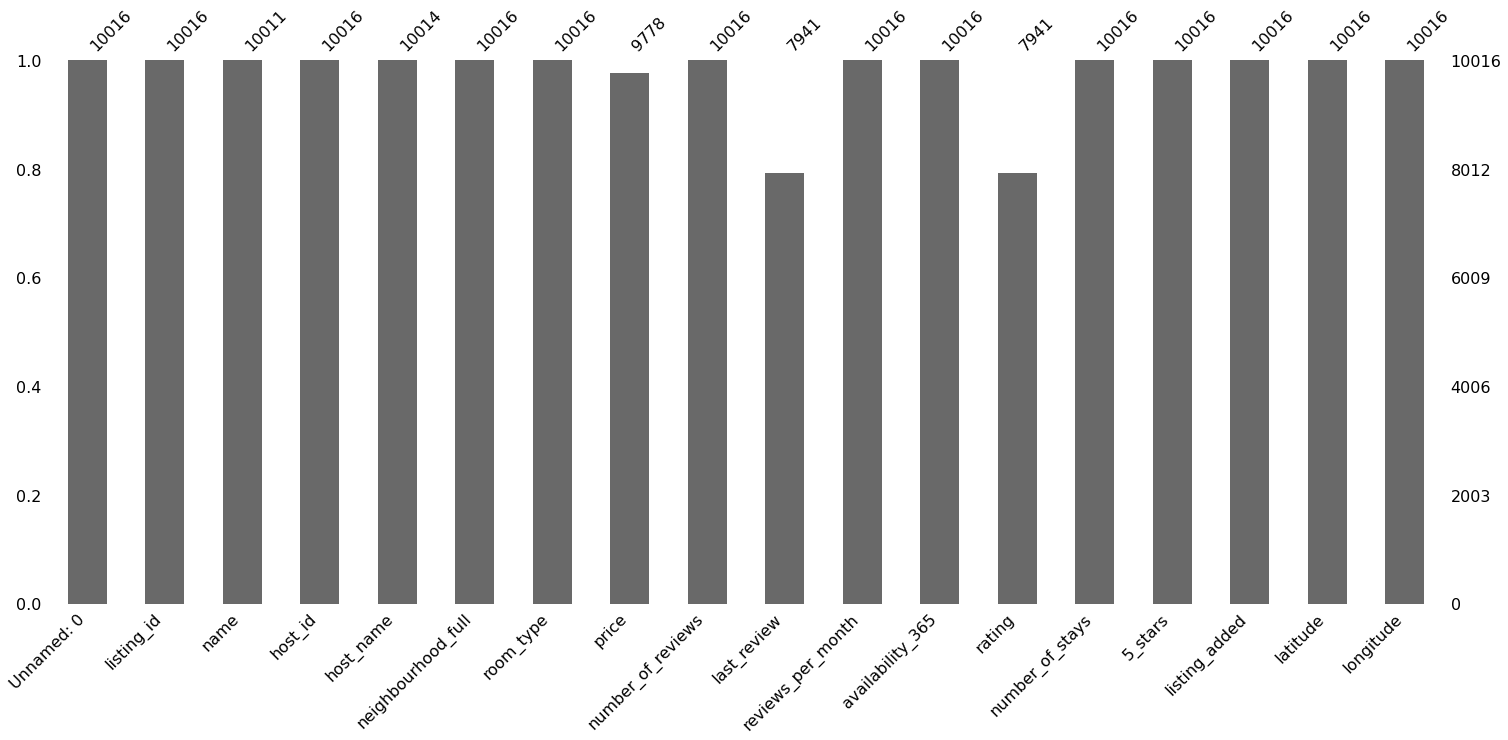

In [ ]:
...

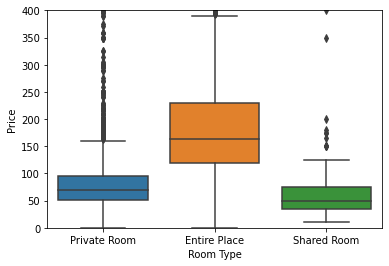

In [105]:
# display relationship between price and room_type
sns.boxplot(data=df_airbnb, x='room_type', y='price')
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [106]:
# compute median price per room_type
df_airbnb.groupby('room_type').median()['price']

df_airbnb.groupby('room_type').max()['price']

room_type
Entire Place    163.0
Private Room     70.0
Shared Room      50.0
Name: price, dtype: float64

In [ ]:
# compute median price per room_type
...

room_type
Entire Place    209.662077
Private Room     88.025922
Shared Room      70.410959
Name: price, dtype: float64